In [1]:
import pandas as pd
import os
import numpy as np
from utils import download_images, get_all_images_data, n_of_images, plot_hist, plot_popular_colors, plot_time

In [2]:
max_lines: int = int(os.environ.get('MAX_ROWS', 3_000))
data: pd.DataFrame = pd.read_csv('Data_WP3_1_Geotagged_Images_v1.0.csv')[:max_lines]
data['DateTime'] = pd.to_datetime(data['DateTime'])

In [3]:
download_images(data['ImageURL/WebcamURL'][:max_lines])

Image at https://farm2.staticflickr.com/1904/45664864391_e95f2df1e2.jpg not downloaded
Image at https://farm2.staticflickr.com/1973/43846506320_aabf5c51d9.jpg not downloaded
Image at https://farm2.staticflickr.com/1931/31791652898_c5edbcc9c5.jpg not downloaded
Image at https://farm2.staticflickr.com/1956/43845748400_11c83b2696.jpg not downloaded
Image at https://farm2.staticflickr.com/1912/45663102821_3467fb02b7.jpg not downloaded
Image at https://farm2.staticflickr.com/1962/45663022751_91814fd1d9.jpg not downloaded
Image at https://farm2.staticflickr.com/1913/43844537820_575e36f905.jpg not downloaded
Image at https://farm2.staticflickr.com/1947/44750583745_6490dc2617.jpg not downloaded
Image at https://farm2.staticflickr.com/1975/45662458241_d23d52df35.jpg not downloaded
Image at https://farm2.staticflickr.com/1976/45662001321_66696720fa.jpg not downloaded
Image at https://farm2.staticflickr.com/1953/45611832942_d9f52f4a95.jpg not downloaded
Image at https://farm2.staticflickr.com/197

In [3]:
new_data: pd.DataFrame = pd.DataFrame(get_all_images_data(os.listdir('img')),
                        columns=['filename', 'size_kb', 'dominant_color', 'width', 'height'])


100%|██████████| 2501/2501 [10:15<00:00,  4.07it/s]


## Task 1

In [4]:
print(f'There are {n_of_images()} images downloaded, {max_lines} csv file lines proceeded. {(1 - n_of_images()/max_lines) * 100:.2f}% of them contains link providing to unavailable image.')

There are 2501 images downloaded, 3000 csv file lines proceeded. 16.63% of them contains link providing to unavailable image.


<IPython.core.display.Javascript object>


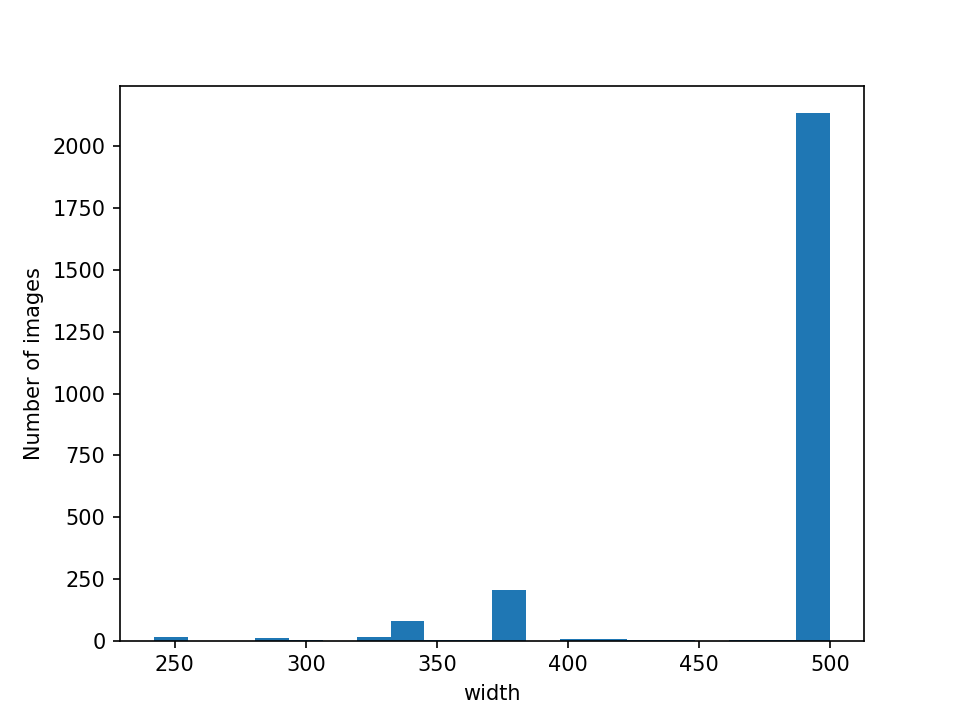

In [5]:
%matplotlib notebook
plot_hist(new_data, 'width')

<IPython.core.display.Javascript object>


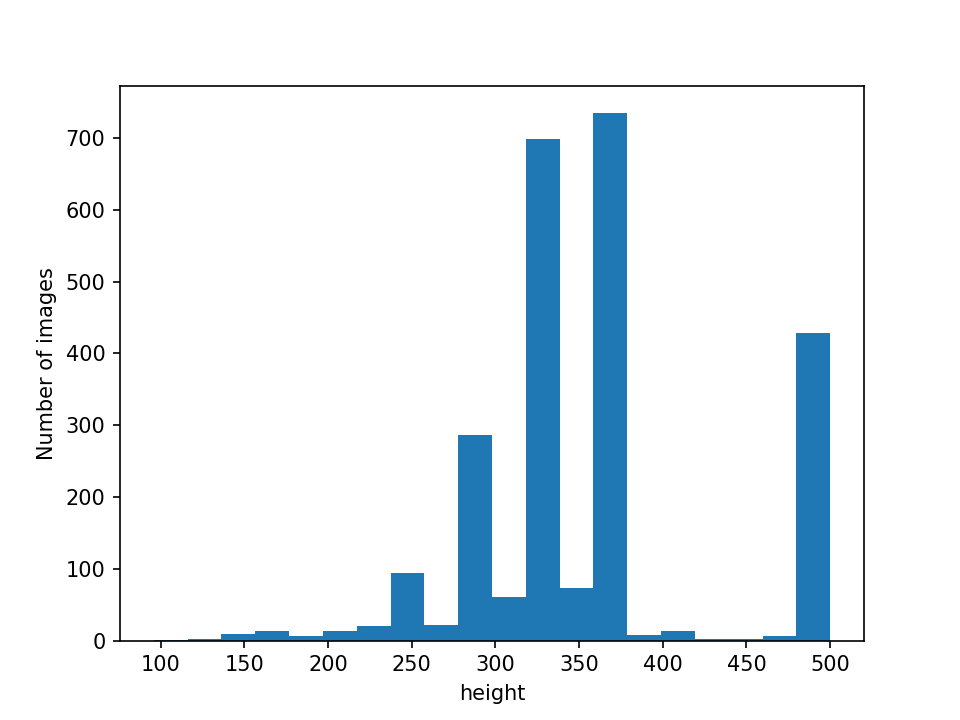

In [6]:
%matplotlib notebook
plot_hist(new_data, 'height')

<IPython.core.display.Javascript object>


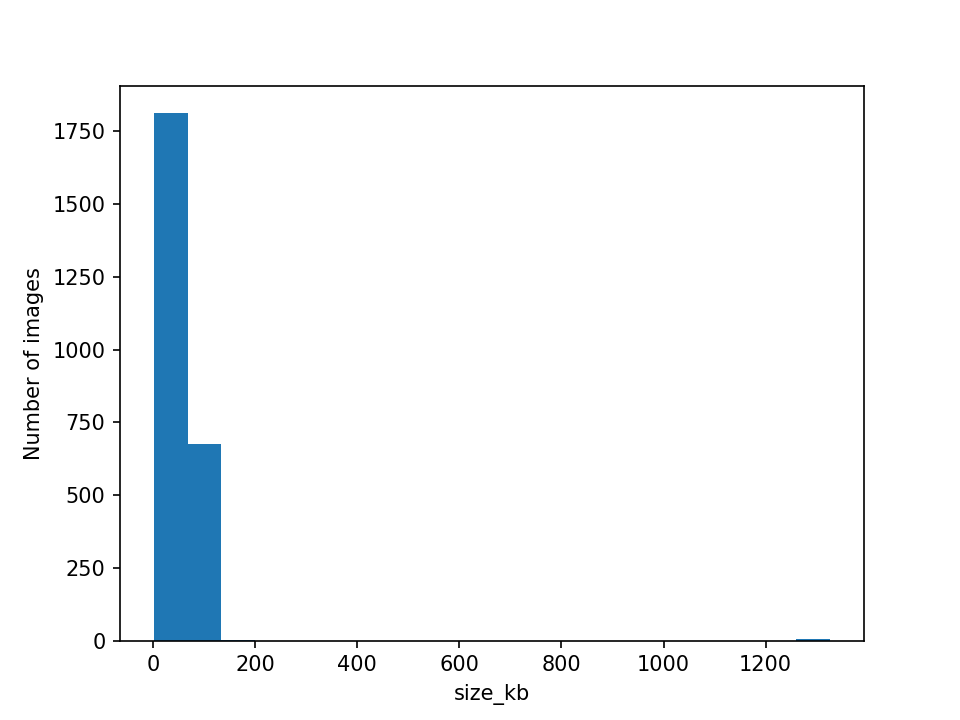

In [7]:
%matplotlib notebook
plot_hist(new_data, 'size_kb')

There are a few images with size over 200kb. Let's take a closer look to left side of histogram. 

<IPython.core.display.Javascript object>


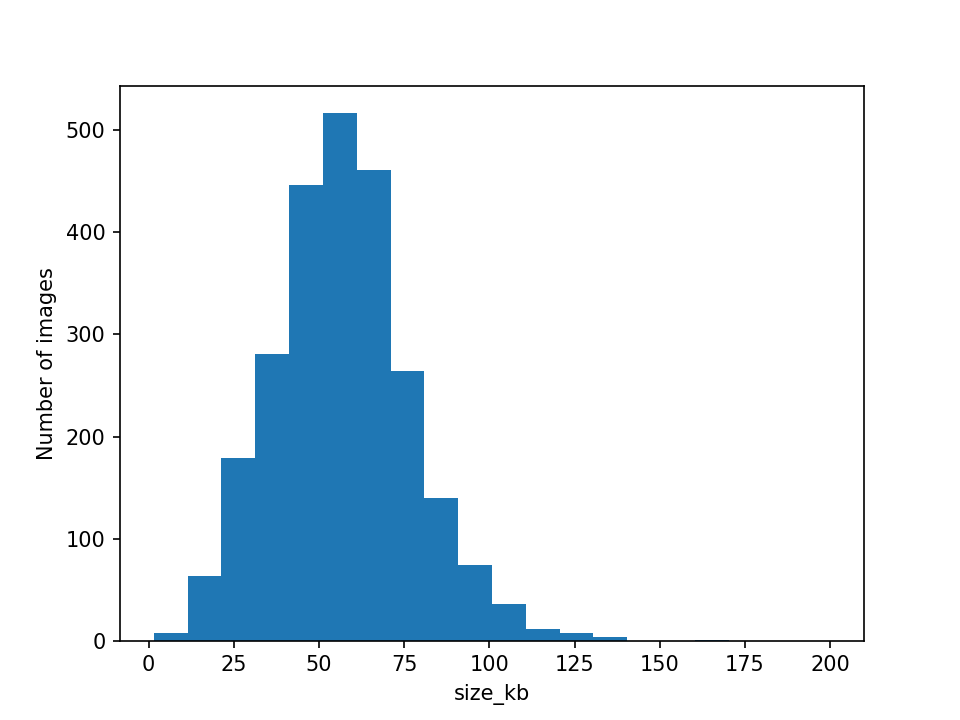

In [8]:
%matplotlib notebook
plot_hist(new_data, 'size_kb', max_bin=200)

In [9]:
data['filename'] = data['ImageURL/WebcamURL'].apply(lambda x: x.split('/')[-1])
full_data = new_data.merge(data)

<IPython.core.display.Javascript object>


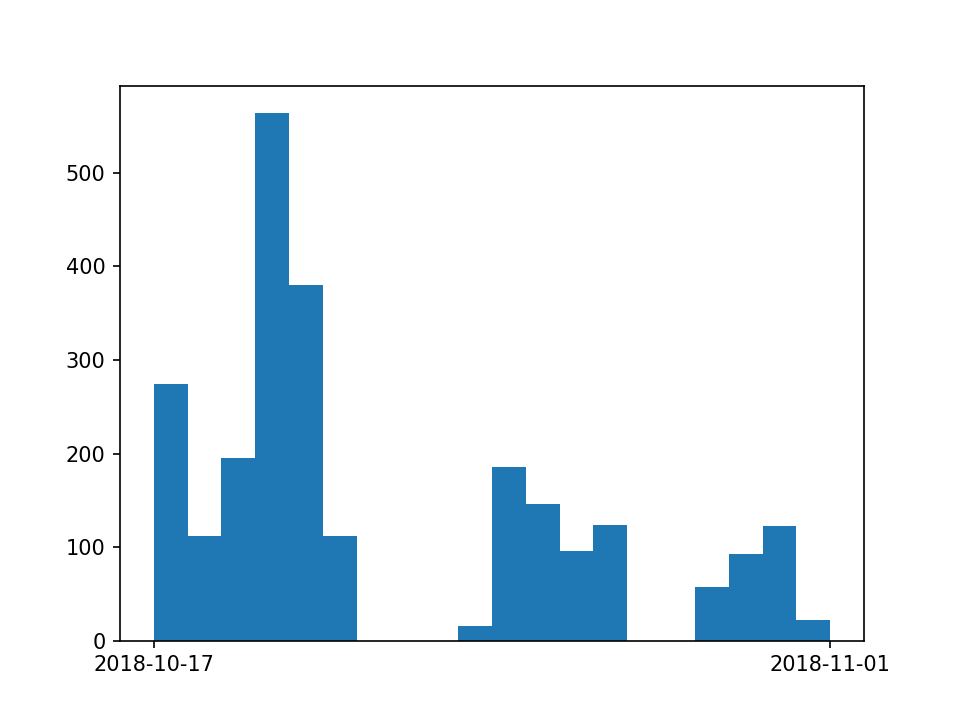

In [10]:
%matplotlib notebook
plot_time(full_data, 'DateTime', 20)

## Task 2

In [11]:
new_full_data=full_data.copy()

new_full_data['Coordinate_x'] = new_full_data['Coordinate_x'].apply(round)
new_full_data['Coordinate_y'] = new_full_data['Coordinate_y'].apply(round)

new_full_data[['Coordinate_x', 'Coordinate_y', 'dominant_color']].groupby(by=['Coordinate_x', 'Coordinate_y']).agg(lambda x: tuple(np.array([[*y] for y in x.values]).mean(axis=0))).reset_index()

,Coordinate_x,Coordinate_y,dominant_color
0,28,-15,"(103.0, 145.0, 185.0)"
1,28,-14,"(103.0, 111.0, 113.0)"
2,29,-18,"(212.0, 219.0, 226.0)"
3,29,-14,"(79.0, 107.125, 125.75)"
4,35,24,"(48.0, 42.0, 30.0)"
...,...,...,...
320,67,14,"(86.16666666666667, 121.16666666666667, 147.16..."
321,68,13,"(38.0, 52.0, 53.0)"
322,69,27,"(134.0, 151.0, 176.5)"
323,70,30,"(148.0, 186.0, 218.0)"


<IPython.core.display.Javascript object>


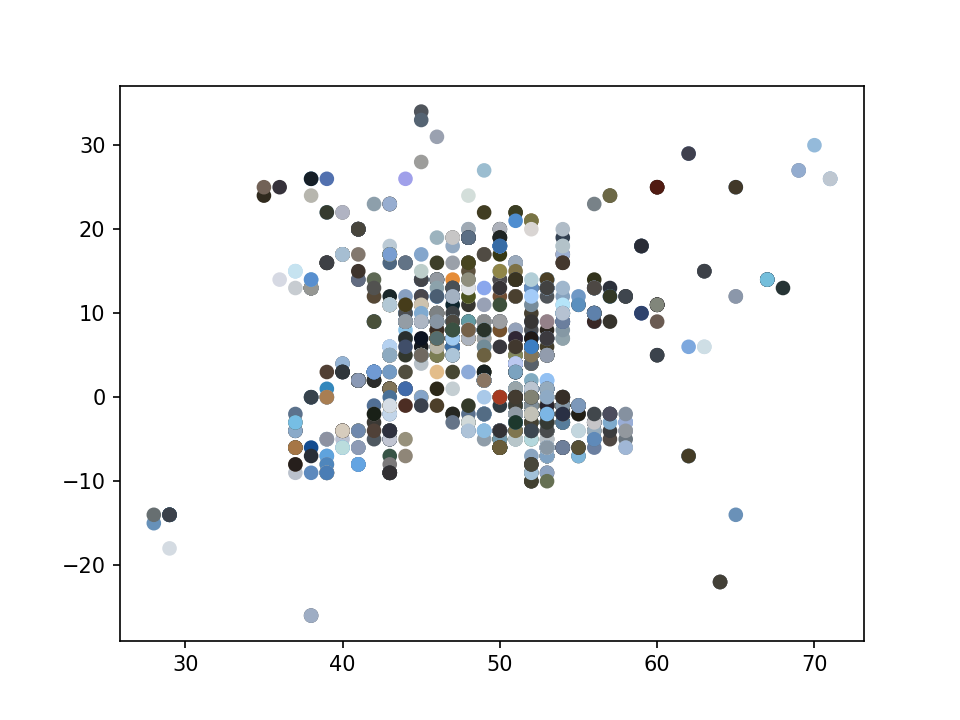

In [12]:
%matplotlib notebook
plot_popular_colors(new_full_data, 'Coordinate_x', 'Coordinate_y', 'dominant_color')